In [51]:
DATASET="rec.mu2e.CRV_wideband_cosmics.CRVWB-000-001-000-006.root"

In [87]:
import os
from mu2etools import *
from mu2etools import wideband

processor = wideband.DataProcessor(xroot=False, fixtimes=True)
ar, arSpills = processor.getData(DATASET)

hep.style.use('ATLAS')  # or ATLAS/LHCb2


In [53]:
list_febID = ar['febID'].to_list()
FEBID = min(list_febID, key=lambda x: len(x))

NFEBS=len(FEBID)
print("Dataset: %s"%DATASET)
print("Number of FEBs: %d"%NFEBS)
print("List of FEBs: %s"%FEBID)

Dataset: rec.mu2e.CRV_wideband_cosmics.CRVWB-000-001-000-006.root
Number of FEBs: 6
List of FEBs: [22, 25, 17, 14, 20, 1]


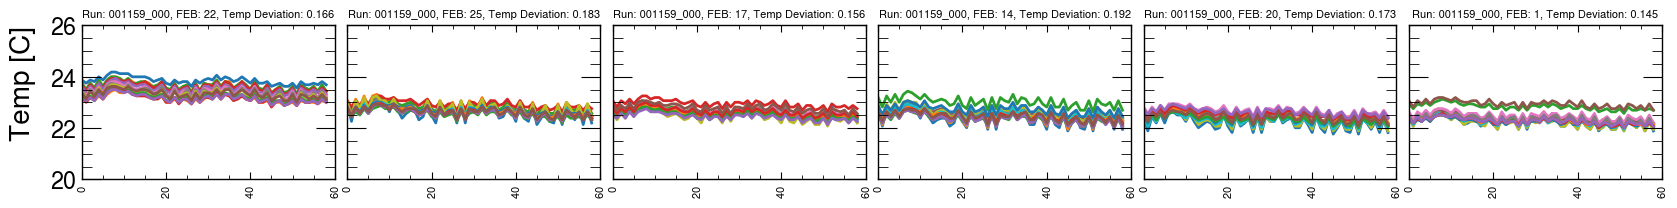

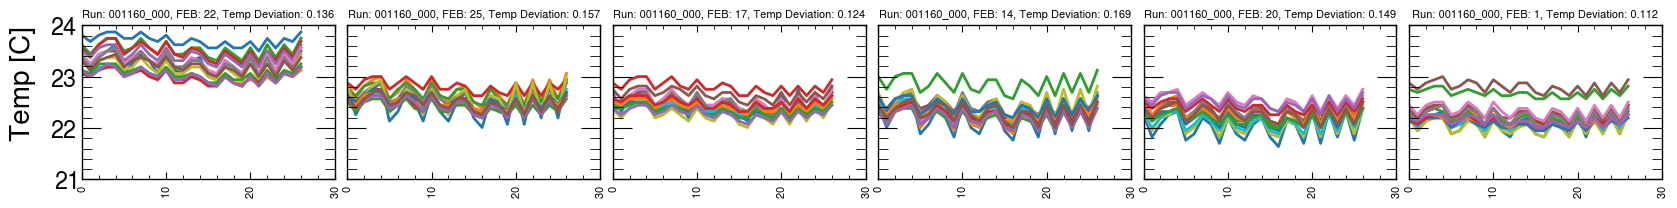

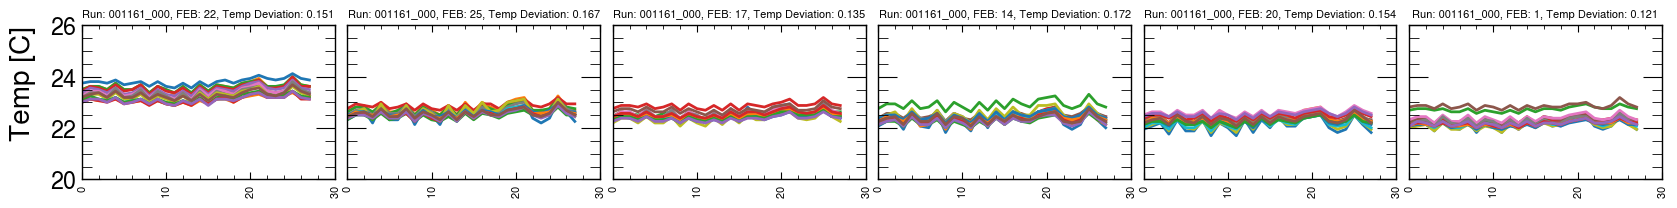

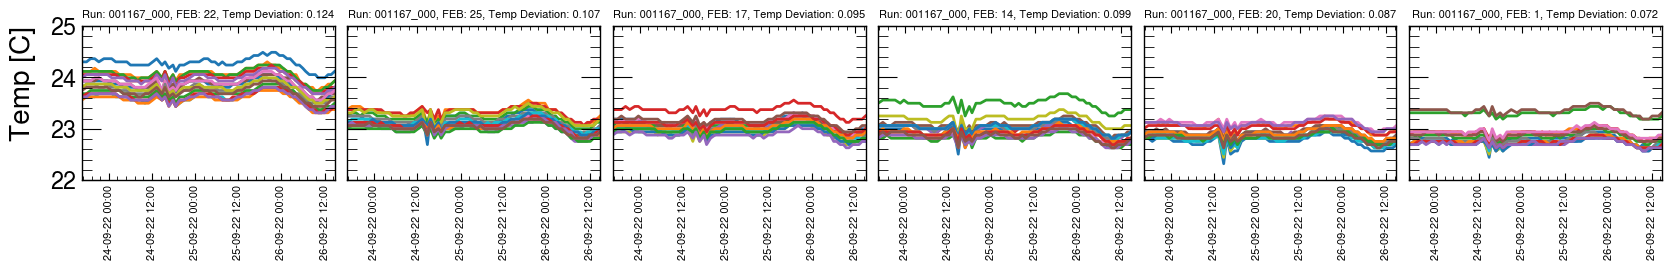

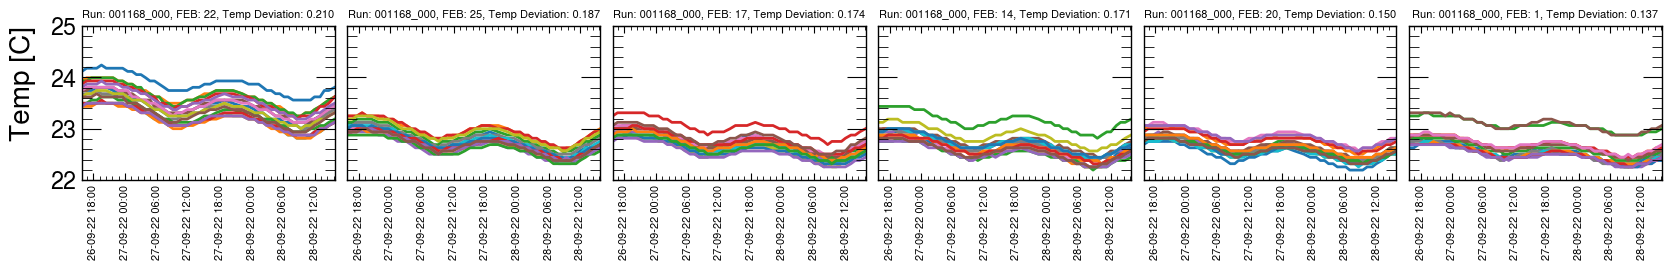

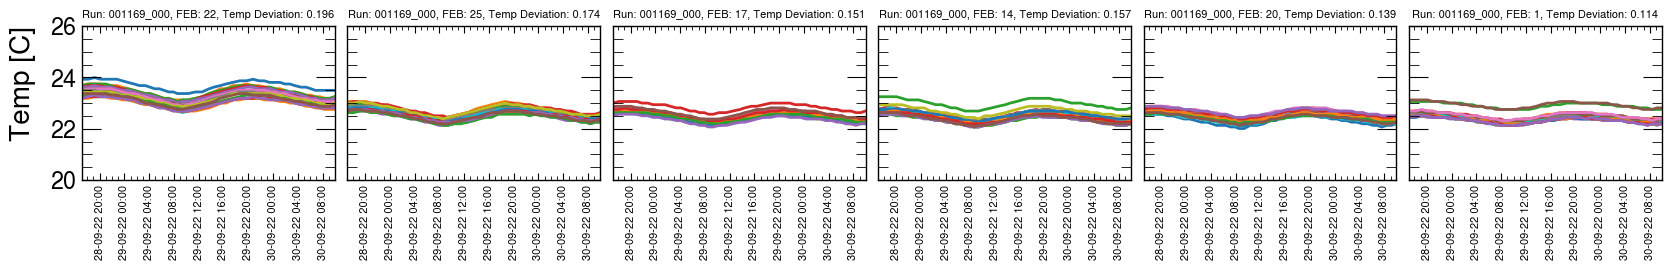

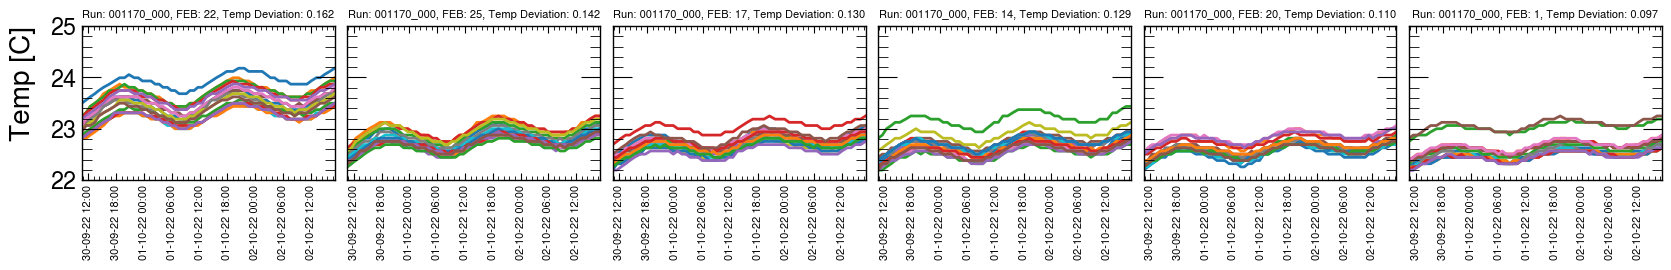

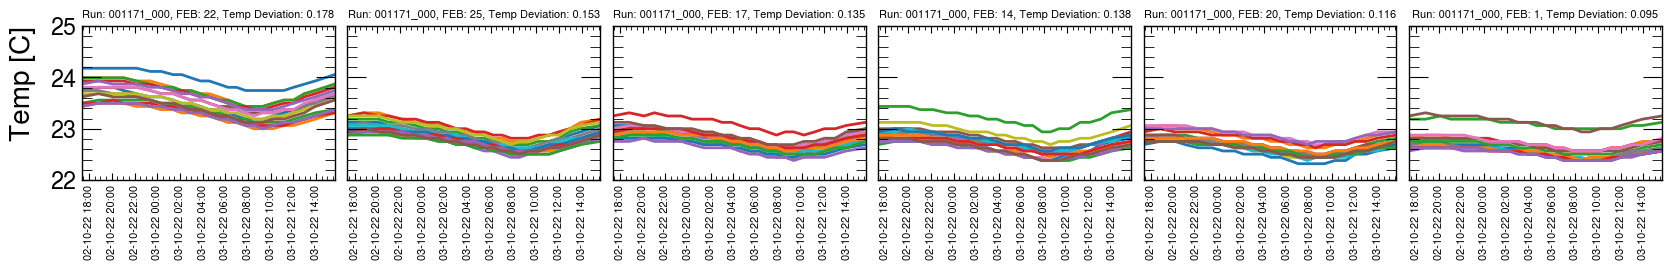

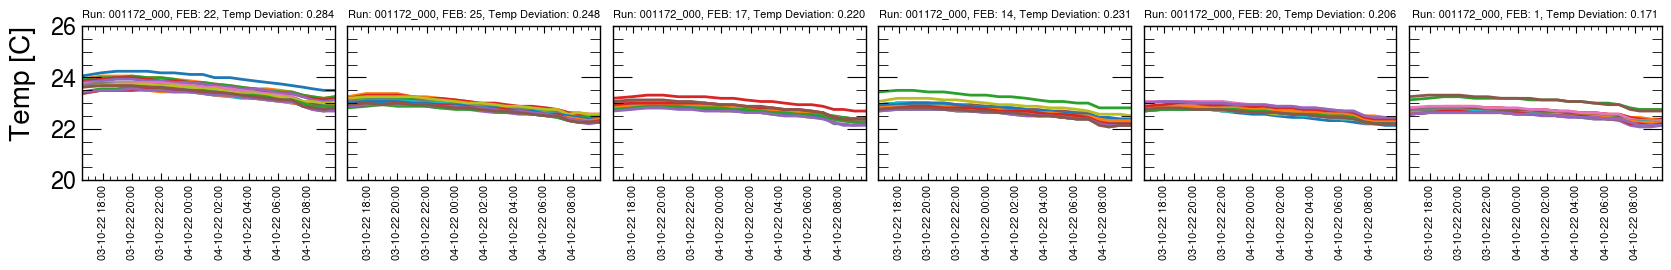

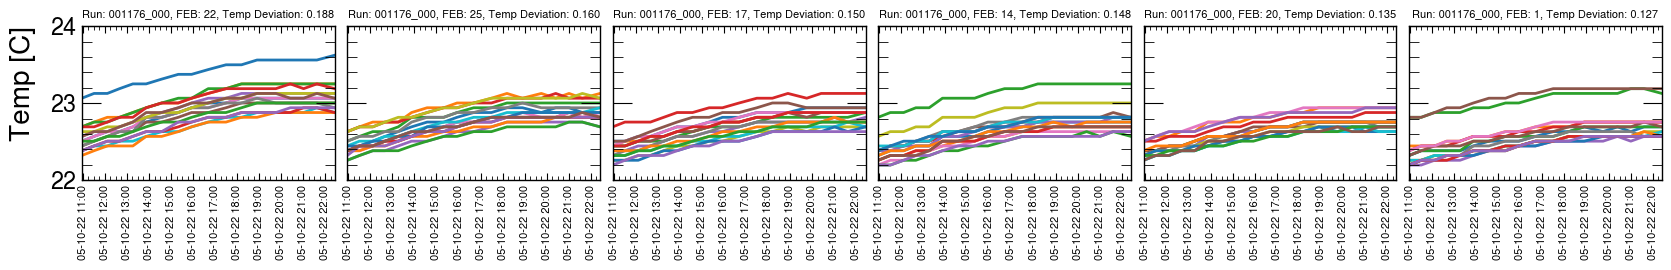

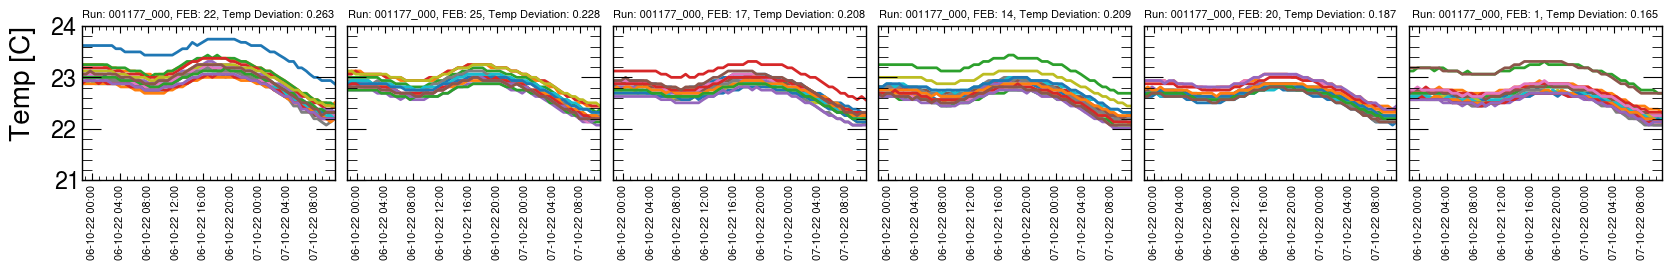

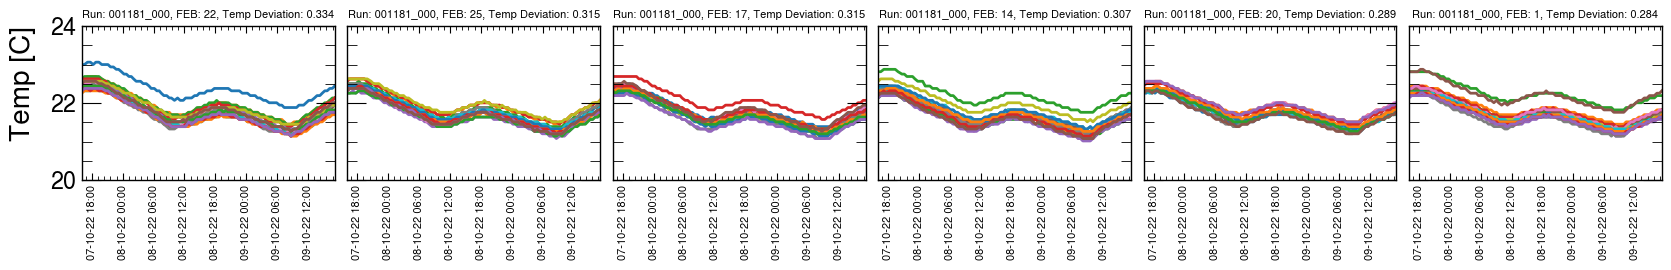

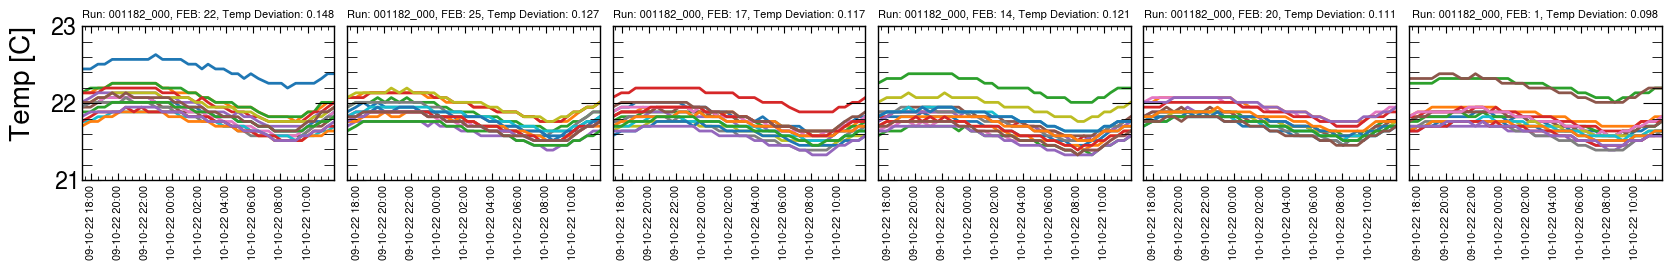

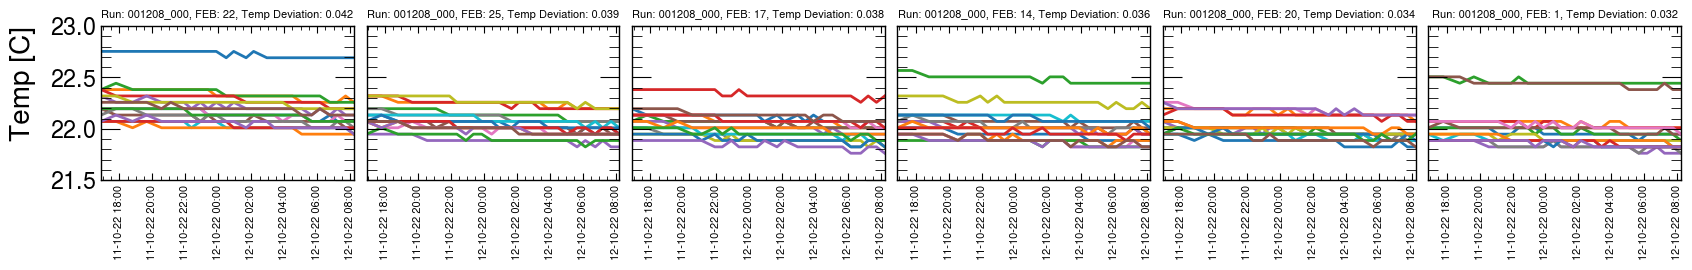

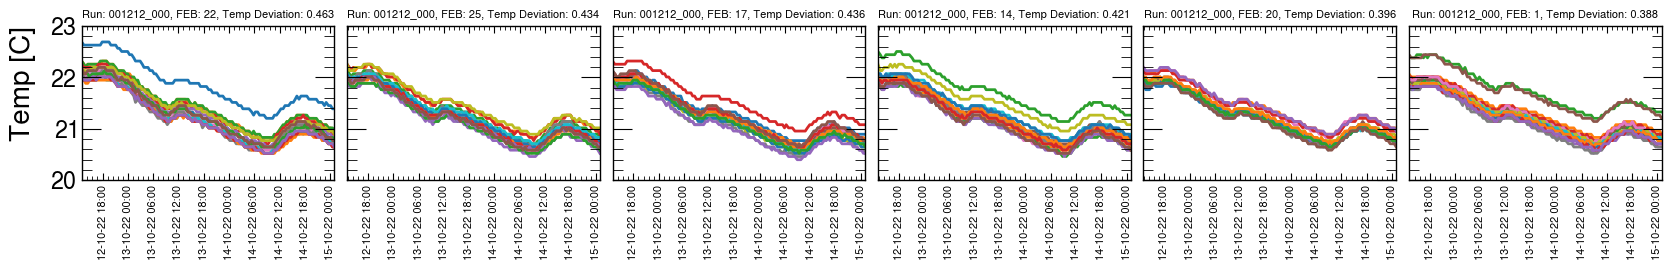

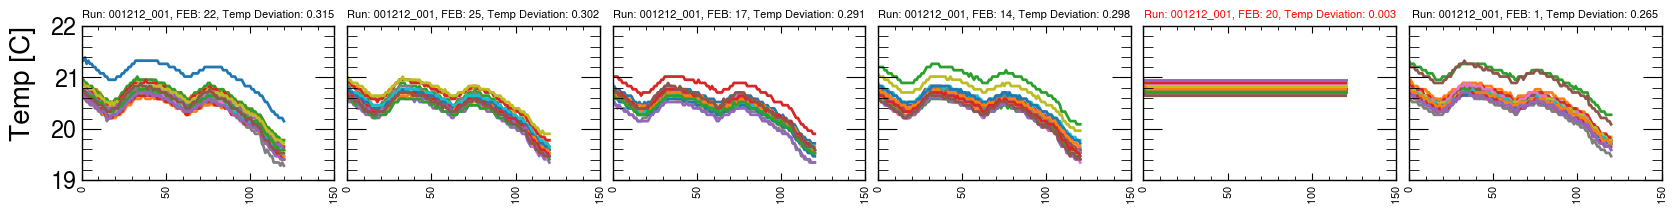

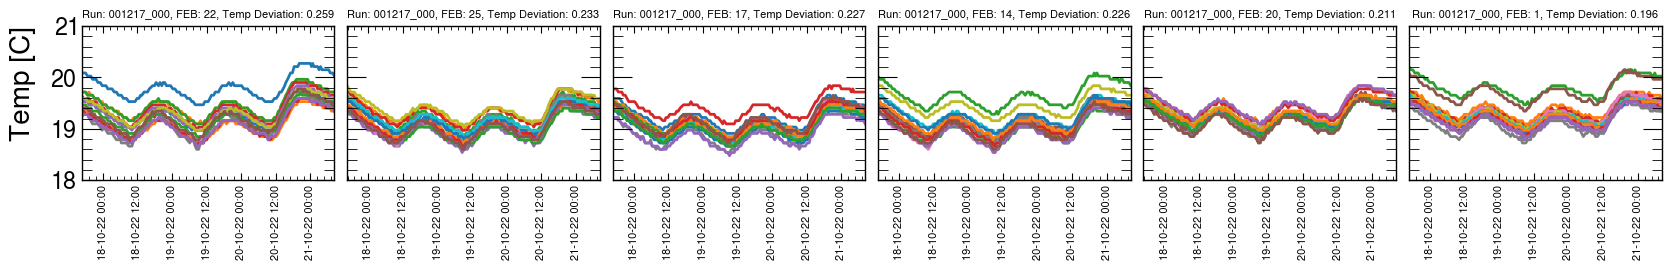

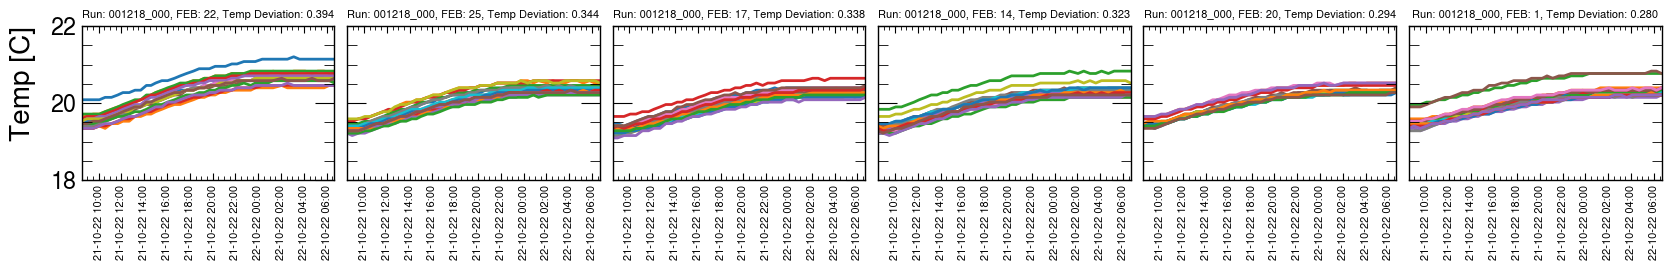

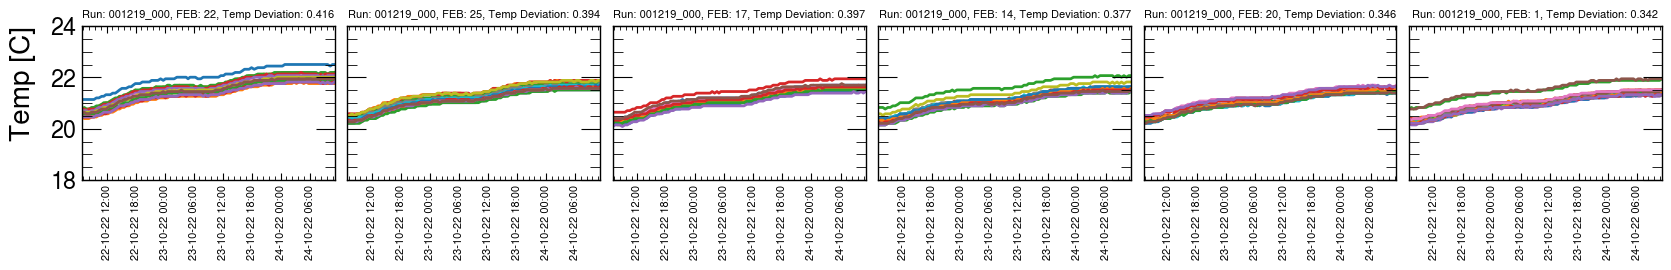

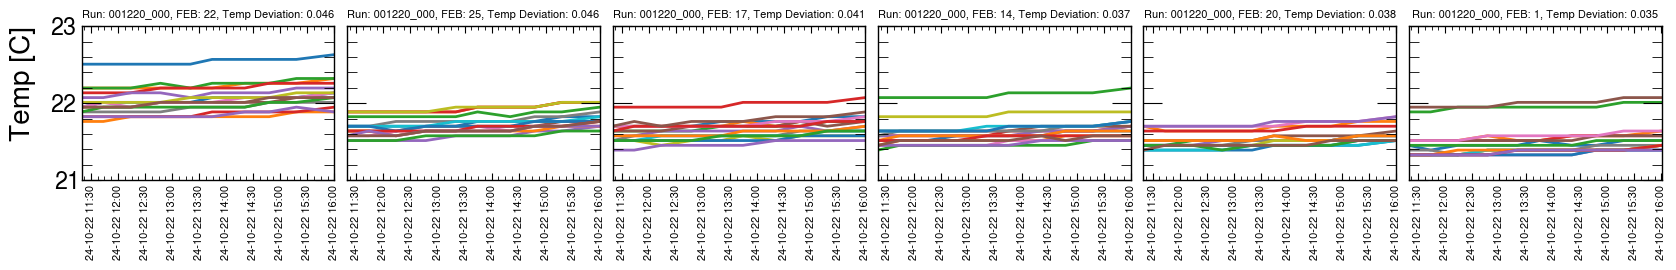

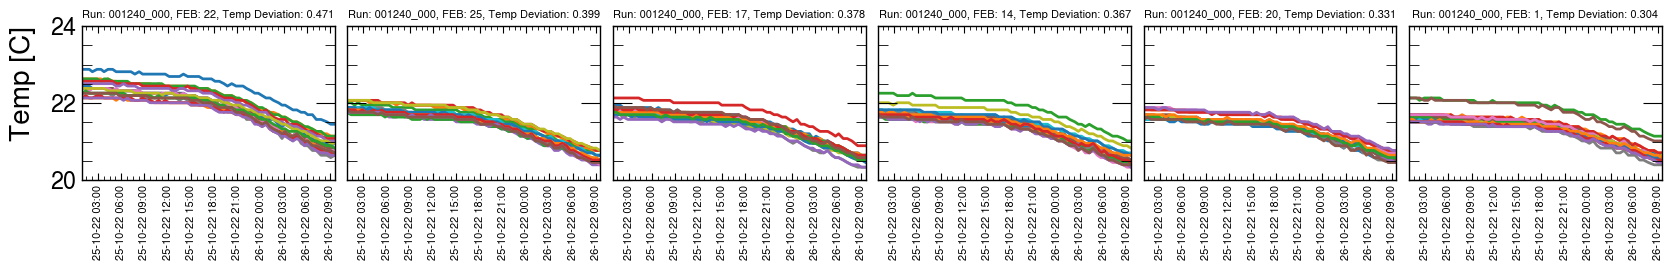

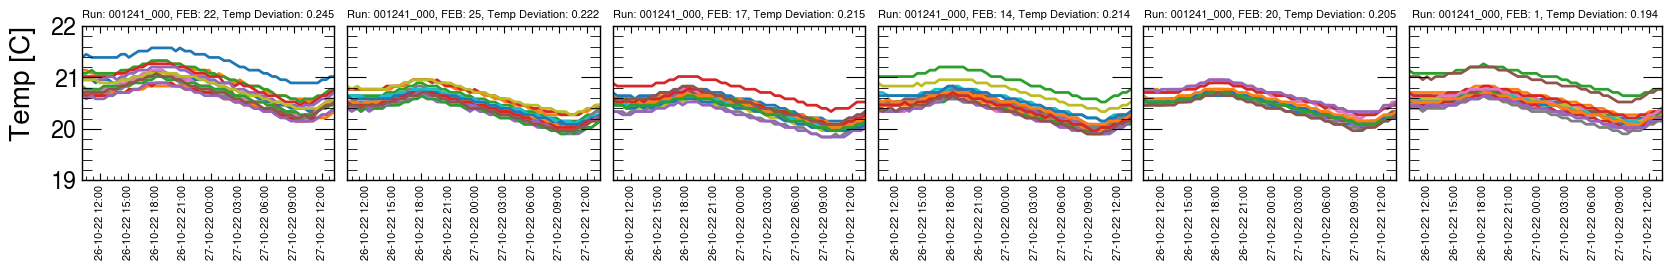

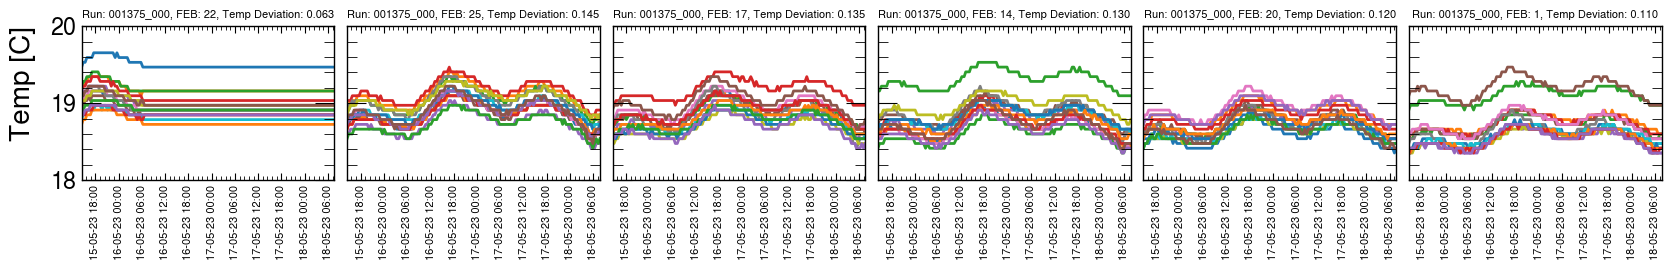

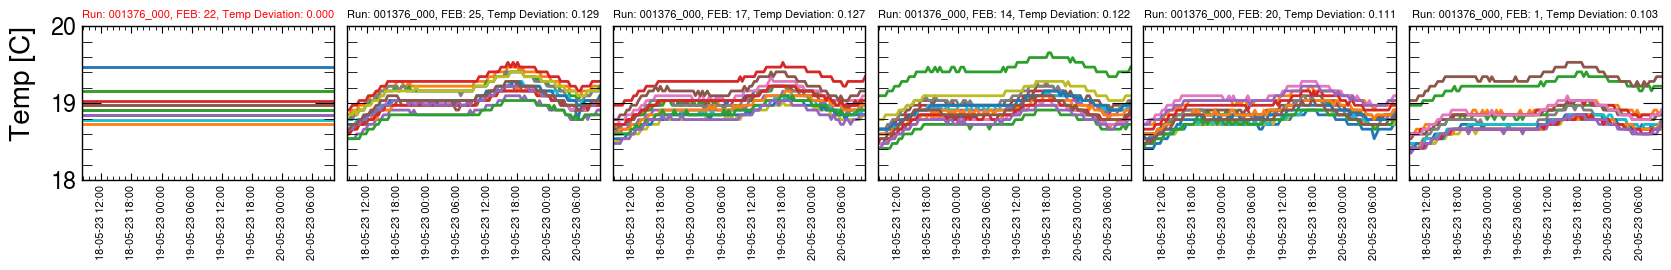

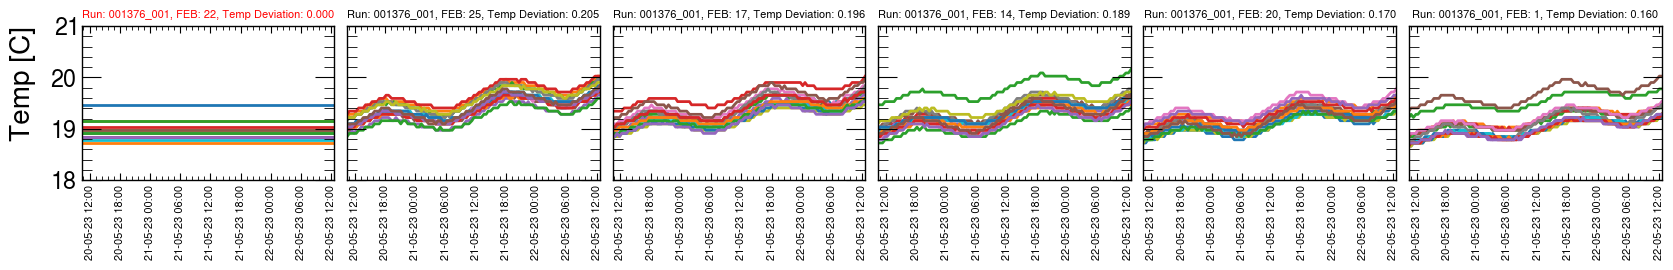

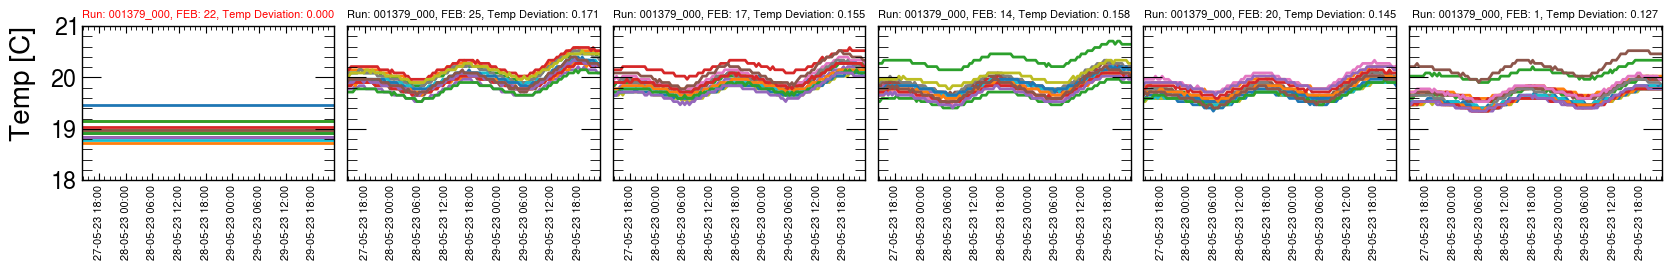

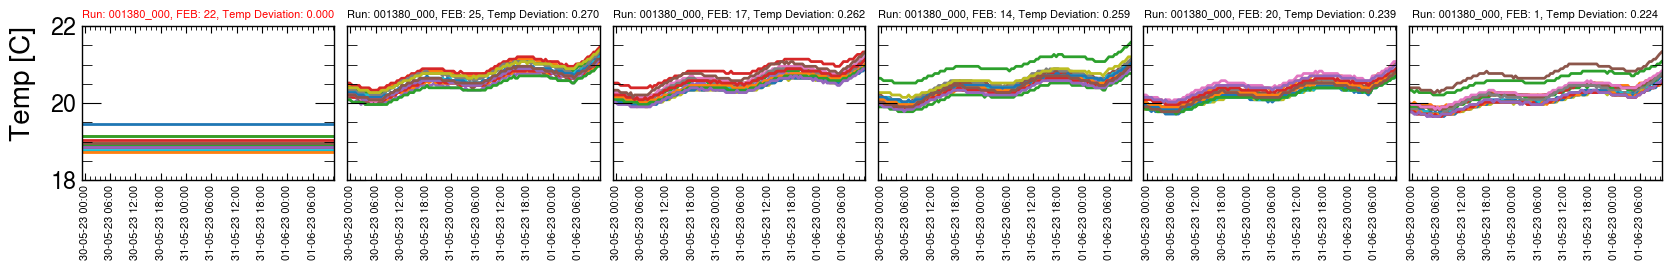

In [89]:
plt.rcParams.update({'figure.max_open_warning': 0})
import matplotlib.dates as mdates
sparsify=2000
epsilon=0.01

for file in processor.getFilelist(DATASET):
    fig, ax1 = plt.subplots(nrows=1, ncols=NFEBS, figsize=(20, 2), sharey='row')
    plt.subplots_adjust(wspace=0.05)
    ax1[0].set_ylabel('Temp [C]')

    for idx, feb in enumerate(FEBID):
        tree = uproot.open(file)["run"]
        arr = tree.arrays(["temperature", "spillTimestamp"])        
        # Read every "srapsify" entry, and every 4th CMB
        x=arr['spillTimestamp'][::sparsify].to_numpy()
        y=arr['temperature'][::sparsify,idx,::4].to_numpy()
        y = np.where(y < epsilon, np.nan, y) # Drop bad SPE points        
        #Plot with dates is the dates are present, otherwise use index
        if np.any(x == 0):
            ax1[idx].plot(y, '-')
        else: 
            ax1[idx].plot(x.astype('datetime64[s]'), y, '-')
            xfmt = mdates.DateFormatter('%d-%m-%y %H:%M')
            ax1[idx].xaxis.set_major_formatter(xfmt)

        # Add title
        y_std = y.astype(float).std(axis=0) # get an array of std for each cmb 
        y_std = np.nanmean(y_std) # get mean of all cmbs
        filename = os.path.basename(file)
        label_text ="Run: %s, FEB: %d, Temp Deviation: %.3f"%(filename.split('.')[-2], feb, y_std)
        ax1[idx].set_title(label_text, fontsize=8, color='black' if y_std > epsilon else 'red')        
        
        #Rotate x-axis labels
        ax1[idx].set_xticks(ax1[idx].get_xticks())
        ax1[idx].set_xticklabels(ax1[idx].get_xticklabels(), rotation=90, fontsize=8)


In [7]:
import datetime
current_time = datetime.datetime.now()
print("Current time:", current_time)

rec.mu2e.CRV_wideband_cosmics.CRVWB-000-001-000-006.root
Current time: 2023-06-03 21:42:34.692744
